T= 0.003799671038392666
Критерій, що забезпечує хороше наближення (>>1): 1.688
Кількість графіків 18


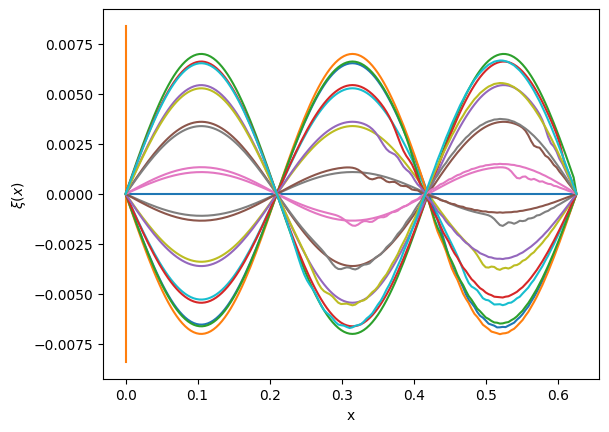

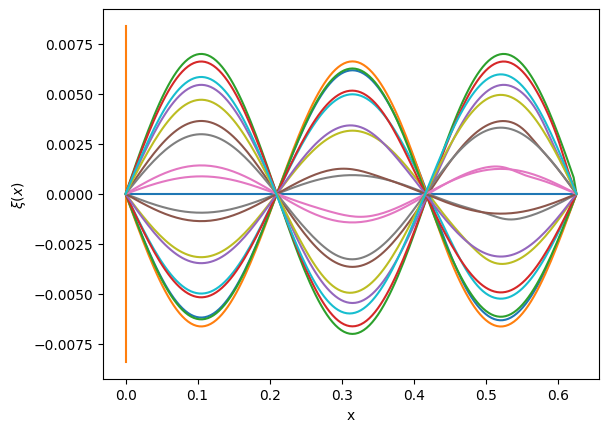

In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt

def fi(xx):
    return fi_m*math.sin(pi*xx*3/(L))

def psi(x):
    return 0
# ЧИСЕЛЬНИЙ РОЗВ'ЯЗОК
# функція початкового зміщення - f(x)=Asin(3pi*x/L)

# t<<h/(q^0.5)
fi_m=0.007
F=96
M=0.00495
L=0.63
q=F*L/M
T=2*L/(3*q**0.5)
print('T=',T)
n=160
m=180
h=L/n
t=T/m
p=h**2/(q*t**2)
krok_t=10  # t*krok_t - різниця в часі між зображеними графіками
print('Критерій, що забезпечує хороше наближення (>>1):',round((h/q**0.5)/t,3))
pi=math.pi

x=[h*k for k in range(0,n)]
y=[t*k for k in range(0,m)]
kx=[[0]*(n) for k in range(m)]
kx1=[[0]*(n) for k in range(m)]
for i in range(1,n-1):
    kx[0][i]=fi(x[i])
    kx[1][i]=kx[0][i]+psi(x[i])*t
    kx1[0][i]=fi(x[i])
    kx1[1][i]=kx1[0][i]+psi(x[i])*t

#ЯВНА СХЕМА
for j in range(1,m-1):
    for i in range(1,n-1):
        kx[j+1][i]=(2*(p-1)*kx[j][i]+kx[j][i+1]+kx[j][i-1]-p*kx[j-1][i])/p
        
#НЕЯВНА СХЕМА
def shar(c):
    mas2=[0 for k in range(n-2)]
    for k in range(1,n-1):
        mas2[k-1]=p*(-2*kx1[c-1][k]+kx1[c-2][k])
    mas2[0]=mas2[0]-kx1[c][0]
    mas2[-1]=mas2[-1]-kx1[c][-1]
    mas3=np.linalg.inv(mas1)
    return np.dot(mas3,mas2)

mas1=[[0]*(n-2) for k in range(n-2)]
for k in range(n-2):
    mas1[k][k]=-p-2
    if k!=0:
        mas1[k][k-1]=1
    if k!=n-3:
        mas1[k][k+1]=1
for k in range(2,m):
    kx1[k][1:-1]=shar(k)
#print(np.array(mas1))

#побудова графіків
fig1=plt.figure()    #явна схема
ax1 = fig1.add_subplot(1, 1, 1)
yox=[0]*len(x)
xoy=[0,0,0]
yoy=[-1.2*fi_m,0,1.2*fi_m]
#plt.ylim([-1.1, 1.1])
ax1.plot(x,yox)
ax1.plot(xoy,yoy)
ax1.set_xlabel('x', fontsize=10)
ax1.set_ylabel(r'$\xi(x)$', fontsize=10)
for k in range(0,m,krok_t):
    ax1.plot(x,kx[k])
    
fig2=plt.figure()  #неявна схема
ax2 = fig2.add_subplot(1, 1, 1)
yox=[0]*len(x)
xoy=[0,0,0]
yoy=[-1.2*fi_m,0,1.2*fi_m]
# plt.ylim([-1.1, 1.1])
ax2.plot(x,yox)
ax2.plot(xoy,yoy)
ax2.set_xlabel('x', fontsize=10)
ax2.set_ylabel(r'$\xi(x)$', fontsize=10)
g=0
for k in range(0,m,krok_t):
    g=g+1
    ax2.plot(x,kx1[k])
print('Кількість графіків',g)
    
plt.show()